In [1]:
from dieboldmariano import dm_test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the predictions from the CSV file

# Baseline Models 
predictions_baseline = pd.read_csv("Results/model_predictions.csv (21-window).csv")
predictions_baseline['DlyCalDt'] = pd.to_datetime(predictions_baseline['DlyCalDt'])

predictions_baseline.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)


predictions_linear = predictions_baseline.copy()
predictions_linear = predictions_baseline.drop(columns=['RF','NN1','NN2','NN3','NN4','NN5','GBRT'])
predictions_nonlinear = predictions_baseline.copy()
predictions_nonlinear = predictions_baseline.drop(columns=['Ridge','OLS','ElasticNet','Lasso','GLM'])

predictions_baseline

,PERMNO,DlyCalDt,ExcessReturn,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,NN2,NN3,NN4,NN5,GBRT
0,10138,2016-01-04,-0.018191,0.000935,0.000935,0.000924,0.000678,0.000789,0.000455,0.002163,0.002147,0.002583,-0.000193,0.001789,0.000771
1,17778,2016-01-04,-0.007616,0.000226,0.000226,0.000622,0.000718,0.000396,0.000455,0.002163,0.002563,0.001493,-0.001016,0.004354,0.000838
2,28388,2016-01-04,-0.015413,0.000477,0.000477,0.000848,0.000724,0.000364,0.000455,0.002163,0.001221,-0.000534,0.000393,0.001524,0.000731
3,34746,2016-01-04,-0.027370,-0.000371,-0.000371,0.000470,0.000666,-0.000256,0.000455,0.002163,0.002823,0.005119,-0.001489,0.000358,0.000376
4,35044,2016-01-04,-0.016674,-0.000457,-0.000457,0.000435,0.000637,-0.000379,0.000455,0.002163,0.005091,0.007124,-0.000728,0.001668,0.000699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,86455,2024-12-31,0.000924,-0.000188,-0.000188,0.000831,0.000696,0.000134,0.000455,0.002163,0.000927,0.000521,-0.000200,0.001241,0.000641
112396,86755,2024-12-31,-0.008607,0.001078,0.001078,0.001012,0.000744,0.001458,0.000455,0.002163,0.000932,0.002201,0.000969,0.002055,0.000735
112397,86868,2024-12-31,-0.001733,-0.000053,-0.000053,0.000686,0.000630,0.000106,0.000455,0.002163,0.001909,-0.002154,0.001368,0.001099,0.000444
112398,87267,2024-12-31,-0.002370,0.000737,0.000737,0.000754,0.000780,0.000262,0.000455,0.002163,0.001462,-0.001111,-0.002791,0.000902,0.000632


In [3]:
y_true = np.array(predictions_linear['ExcessReturn'])

y_lasso = np.array(predictions_linear['Lasso'])
y_ols = np.array(predictions_linear['OLS'])
y_ridge = np.array(predictions_linear['Ridge'])
y_elasticnet = np.array(predictions_linear['ElasticNet'])   
y_glm = np.array(predictions_linear['GLM'])

# Comparing elastic net with other models using the Diebold-Mariano test
stat1, p_value1 = dm_test(y_true, y_elasticnet, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat1}, p-value: {p_value1}")
stat2, p_value2 = dm_test(y_true, y_elasticnet, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat2}, p-value: {p_value2}")
stat3, p_value3 = dm_test(y_true, y_elasticnet, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat3}, p-value: {p_value3}")
stat4, p_value4 = dm_test(y_true, y_elasticnet, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat4}, p-value: {p_value4}")

# Comparing linear models with each other using the Diebold-Mariano test
stat5, p_value5 = dm_test(y_true, y_ridge, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat5}, p-value: {p_value5}")
stat6, p_value6 = dm_test(y_true, y_ridge, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat6}, p-value: {p_value6}")
stat7, p_value7 = dm_test(y_true, y_ridge, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat7}, p-value: {p_value7}")
stat8, p_value8 = dm_test(y_true, y_ridge, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat8}, p-value: {p_value8}")
stat9, p_value9 = dm_test(y_true, y_lasso, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat9}, p-value: {p_value9}")
stat10, p_value10 = dm_test(y_true, y_lasso, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat10}, p-value: {p_value10}")
stat11, p_value11 = dm_test(y_true, y_lasso, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat11}, p-value: {p_value11}")    
stat12, p_value12 = dm_test(y_true, y_lasso, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat12}, p-value: {p_value12}")   
stat13, p_value13 = dm_test(y_true, y_ols, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat13}, p-value: {p_value13}")    
stat14, p_value14 = dm_test(y_true, y_ols, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat14}, p-value: {p_value14}")
stat15, p_value15 = dm_test(y_true, y_ols, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat15}, p-value: {p_value15}")
stat16, p_value16 = dm_test(y_true, y_ols, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat16}, p-value: {p_value16}")




Diebold-Mariano test statistic: -11.30057018003664, p-value: 1.3525716873537765e-29
Diebold-Mariano test statistic: -11.300570090787522, p-value: 1.352573060472505e-29
Diebold-Mariano test statistic: 0.5161917028500627, p-value: 0.6057215400985334
Diebold-Mariano test statistic: -11.358103861259222, p-value: 7.0183038089169e-30
Diebold-Mariano test statistic: 8.215827636825871, p-value: 2.1291470063214714e-16
Diebold-Mariano test statistic: 3.0273668427481675, p-value: 0.0024675019113357195
Diebold-Mariano test statistic: 11.300570090787522, p-value: 1.352573060472505e-29
Diebold-Mariano test statistic: -9.032465697547961, p-value: 1.7041010723682165e-19
Diebold-Mariano test statistic: -8.18302171521943, p-value: 2.796693726274367e-16
Diebold-Mariano test statistic: -0.5161917028500627, p-value: 0.6057215400985334
Diebold-Mariano test statistic: -8.215827729338672, p-value: 2.129145365690827e-16
Diebold-Mariano test statistic: -8.215827636825871, p-value: 2.1291470063214714e-16
Diebold

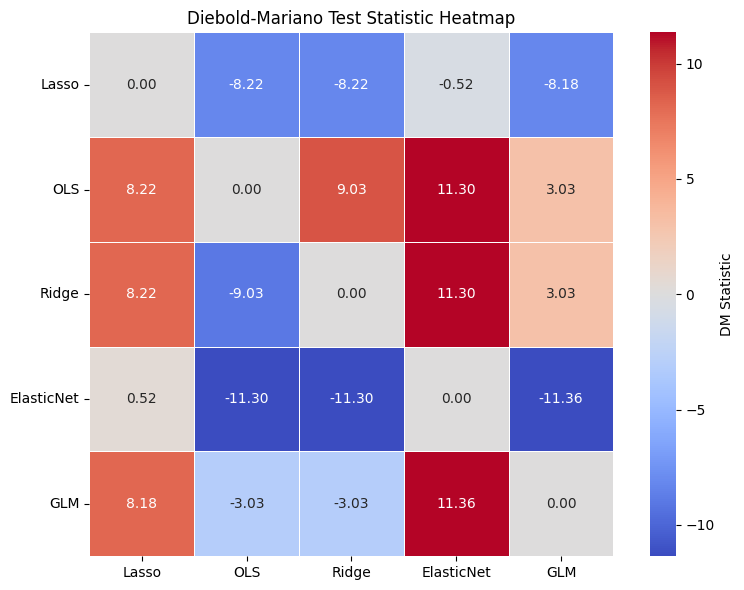

In [4]:
# === Step 1: Collect model predictions ===
linear_model_preds = {
    'Lasso': np.array(predictions_linear['Lasso']),
    'OLS': np.array(predictions_linear['OLS']),
    'Ridge': np.array(predictions_linear['Ridge']),
    'ElasticNet': np.array(predictions_linear['ElasticNet']),
    'GLM': np.array(predictions_linear['GLM'])
}

model_names = list(linear_model_preds.keys())
n = len(model_names)

# === Step 2: Create a DM statistic matrix ===
dm_matrix = np.zeros((n, n))  # DM statistic matrix

y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, linear_model_preds[model_names[i]], linear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

# === Step 3: Convert to DataFrame for plotting ===
dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

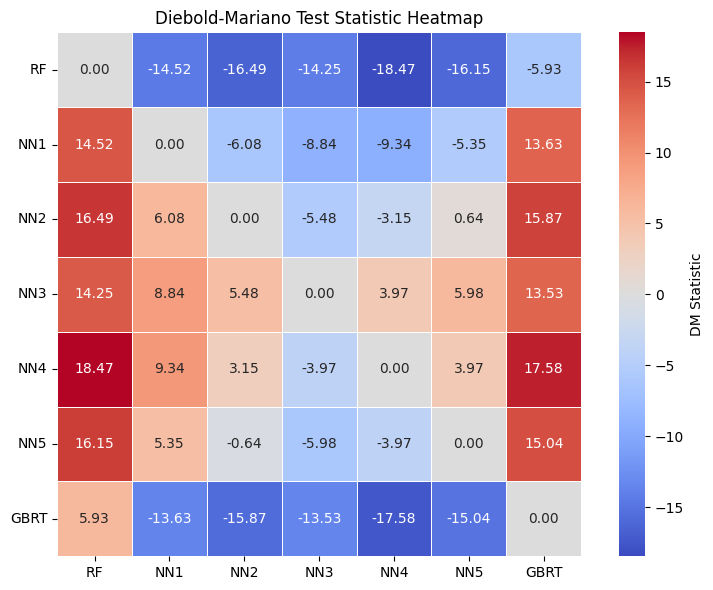

In [5]:
nonlinear_model_preds = {
    'RF': np.array(predictions_nonlinear['RF']),
    'NN1': np.array(predictions_nonlinear['NN1']),
    'NN2': np.array(predictions_nonlinear['NN2']),      
    'NN3': np.array(predictions_nonlinear['NN3']),
    'NN4': np.array(predictions_nonlinear['NN4']),
    'NN5': np.array(predictions_nonlinear['NN5']),
    'GBRT': np.array(predictions_nonlinear['GBRT'])
}

model_names = list(nonlinear_model_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, nonlinear_model_preds[model_names[i]], nonlinear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_chronos = pd.read_csv("Results/chronos(21-day).csv")

predictions_chronos['DlyCalDt'] = pd.to_datetime(predictions_chronos['DlyCalDt'])

predictions_chronos.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

chronos_models_preds = {
    'chr_bolt_tiny': np.array(predictions_chronos['y_chr_bolt_tiny']),
    'chr_bolt_mini': np.array(predictions_chronos['y_chr_bolt_mini']),
    'chr_bolt_small': np.array(predictions_chronos['y_chr_bolt_small']),
    'chr_bolt_base': np.array(predictions_chronos['y_chr_bolt_base']),
    'chr_t5_tiny': np.array(predictions_chronos['y_chr_t5_tiny']),
    'chr_t5_mini': np.array(predictions_chronos['y_chr_t5_mini']),
    'chr_t5_small': np.array(predictions_chronos['y_chr_t5_small'])
}

chronos_models = list(chronos_models_preds.keys())
n = len(chronos_models)

In [7]:
predictions_chronos

,PERMNO,ExcessReturn,DlyCalDt,y_chr_bolt_tiny,y_chr_bolt_mini,y_chr_bolt_small,y_chr_bolt_base,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small
0,10138,-0.018191,2016-01-04,-0.006655,-0.004959,-0.005876,-0.004940,0.001673,0.001457,-0.001117
1,17778,-0.007616,2016-01-04,-0.006960,-0.005093,-0.006515,-0.005731,0.000397,-0.000885,-0.002104
2,28388,-0.015413,2016-01-04,-0.007591,-0.004466,-0.005211,-0.004785,-0.001482,-0.001674,-0.001709
3,34746,-0.027370,2016-01-04,-0.004071,-0.003725,-0.006322,-0.006360,-0.005600,0.003400,-0.002636
4,35044,-0.016674,2016-01-04,-0.003430,-0.003415,-0.004964,-0.005522,-0.002721,0.000552,-0.001344
...,...,...,...,...,...,...,...,...,...,...
112395,86455,0.000924,2024-12-31,-0.005867,-0.003764,-0.005856,-0.004027,-0.002792,-0.003121,-0.003048
112396,86755,-0.008607,2024-12-31,-0.005029,-0.005133,-0.005890,-0.004680,-0.000193,-0.000987,-0.000652
112397,86868,-0.001733,2024-12-31,-0.002946,-0.001362,-0.003259,-0.002465,-0.001720,-0.001184,-0.002174
112398,87267,-0.002370,2024-12-31,-0.012817,-0.011046,-0.011086,-0.008270,-0.001877,-0.004184,-0.002601


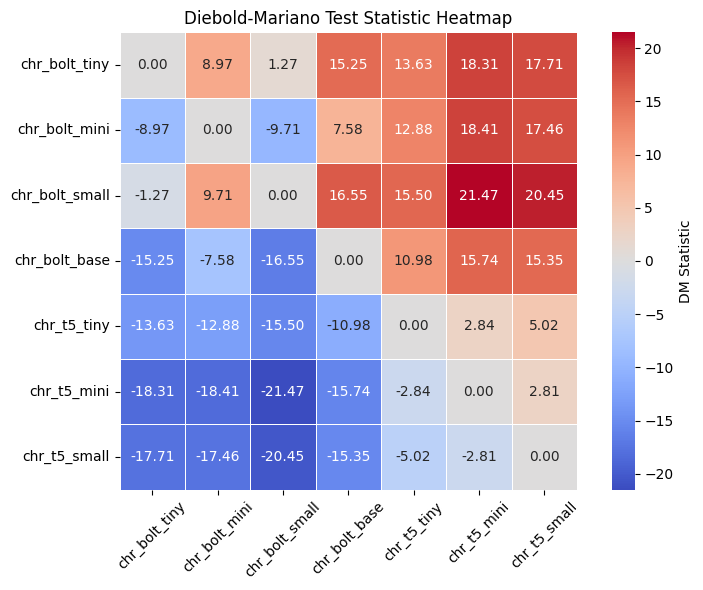

In [8]:
chronos_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            chronos_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, chronos_models_preds[chronos_models[i]], chronos_models_preds[chronos_models[j]], h=1)
            chronos_matrix[i, j] = stat

chronos_df = pd.DataFrame(chronos_matrix, index=chronos_models, columns=chronos_models)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(chronos_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_timesfm = pd.read_csv("Results/timesfm(21-day).csv")
predictions_timesfm['DlyCalDt'] = pd.to_datetime(predictions_timesfm['DlyCalDt'])

predictions_timesfm.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)


timesfm_models_preds = {
    'tfm1': np.array(predictions_timesfm['y_tfm1']),
    'tfm2': np.array(predictions_timesfm['y_tfm2'])
}
timesfm_models = list(timesfm_models_preds.keys())
n = len(timesfm_models)

timesfm_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            timesfm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, timesfm_models_preds[timesfm_models[i]], timesfm_models_preds[timesfm_models[j]], h=1)
            timesfm_matrix[i, j] = stat

timesfm_df = pd.DataFrame(timesfm_matrix, index=timesfm_models, columns=timesfm_models)

timesfm_df

,tfm1,tfm2
tfm1,0.000000,-53.332211
tfm2,53.332211,0.000000


In [10]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_uni2ts = pd.read_csv("Results/uni2ts(21-day)predictions.csv")
predictions_uni2ts['DlyCalDt'] = pd.to_datetime(predictions_uni2ts['DlyCalDt'])

predictions_uni2ts.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

uni2ts_models_preds = {
    'moirai_s': np.array(predictions_uni2ts['y_moirai_s']),
    'moirai_moe_s': np.array(predictions_uni2ts['y_moirai_moe_s']),
    'moirai_moe_b': np.array(predictions_uni2ts['y_moirai_moe_b'])
}
uni2ts_models = list(uni2ts_models_preds.keys())
n = len(uni2ts_models)

uni2ts_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            uni2ts_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, uni2ts_models_preds[uni2ts_models[i]], uni2ts_models_preds[uni2ts_models[j]], h=1)
            uni2ts_matrix[i, j] = stat

uni2ts_df = pd.DataFrame(uni2ts_matrix, index=uni2ts_models, columns=uni2ts_models)

uni2ts_df

,moirai_s,moirai_moe_s,moirai_moe_b
moirai_s,0.000000,1.531997,1.530820
moirai_moe_s,-1.531997,0.000000,-4.888302
moirai_moe_b,-1.530820,4.888302,0.000000


In [11]:
# Comparing all the models with each other 

all_models_preds = {
    **linear_model_preds,
    **nonlinear_model_preds,
    **chronos_models_preds,
    **timesfm_models_preds,
    **uni2ts_models_preds
    
}
model_names = list(all_models_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n, n))  # DM statistic matrix
y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, all_models_preds[model_names[i]], all_models_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)
dm_df
# === Step 3: Convert to DataFrame for plotting ===

,Lasso,OLS,Ridge,ElasticNet,GLM,RF,NN1,NN2,NN3,NN4,...,chr_bolt_small,chr_bolt_base,chr_t5_tiny,chr_t5_mini,chr_t5_small,tfm1,tfm2,moirai_s,moirai_moe_s,moirai_moe_b
Lasso,0.000000,-8.215828,-8.215828,-0.516192,-8.183022,1.891423,-13.788724,-15.797513,-14.484283,-18.372805,...,-24.324949,-20.495639,-19.105101,-17.664246,-18.346490,-18.518542,-49.667384,-1.532427,-28.790025,-6.675698
OLS,8.215828,0.000000,9.032466,11.300570,3.027368,10.425809,-13.103736,-15.027255,-13.595198,-17.499969,...,-21.366231,-17.924000,-15.974922,-14.040625,-14.422958,-15.460694,-47.214110,-1.532411,-27.492453,-6.609160
Ridge,8.215828,-9.032466,0.000000,11.300570,3.027367,10.425808,-13.103736,-15.027255,-13.595198,-17.499969,...,-21.366231,-17.924000,-15.974922,-14.040625,-14.422958,-15.460694,-47.214110,-1.532411,-27.492453,-6.609160
ElasticNet,0.516192,-11.300570,-11.300570,0.000000,-11.358104,2.389740,-14.078148,-15.997903,-14.397805,-18.464545,...,-23.506734,-19.833061,-18.353075,-16.836129,-17.457790,-17.752378,-48.726751,-1.532427,-28.723219,-6.674210
GLM,8.183022,-3.027368,-3.027367,11.358104,0.000000,10.222185,-13.129036,-15.045653,-13.624398,-17.523952,...,-21.452244,-17.999116,-16.057321,-14.138741,-14.525969,-15.546384,-47.291448,-1.532411,-27.530983,-6.610924
RF,-1.891423,-10.425809,-10.425808,-2.389740,-10.222185,0.000000,-14.524115,-16.485597,-14.250263,-18.474120,...,-22.892373,-19.323471,-18.126358,-16.326411,-16.964319,-17.328987,-48.166888,-1.532430,-28.803021,-6.689746
NN1,13.788724,13.103736,13.103736,14.078148,13.129036,14.524115,0.000000,-6.081776,-8.843530,-9.336318,...,-12.337855,-9.731148,-4.586207,-2.983446,-2.136142,-5.568190,-39.453230,-1.532307,-17.998665,-6.173805
NN2,15.797513,15.027255,15.027255,15.997903,15.045653,16.485597,6.081776,0.000000,-5.475525,-3.154450,...,-8.230201,-5.884638,0.126224,1.454669,2.540332,-1.311084,-33.689601,-1.532241,-12.846788,-5.895958
NN3,14.484283,13.595198,13.595198,14.397805,13.624398,14.250263,8.843530,5.475525,0.000000,3.965333,...,-2.900313,-0.842456,5.263620,6.267140,6.932243,3.869835,-29.053398,-1.532135,-5.520813,-5.443231
NN4,18.372805,17.499969,17.499969,18.464545,17.523952,18.474120,9.336318,3.154450,-3.965333,0.000000,...,-6.827449,-4.403723,2.446804,3.762920,4.976051,0.649802,-33.973760,-1.532206,-10.894857,-5.750335


In [12]:
dm_df.to_csv("Results/DM_Test_Results.csv")

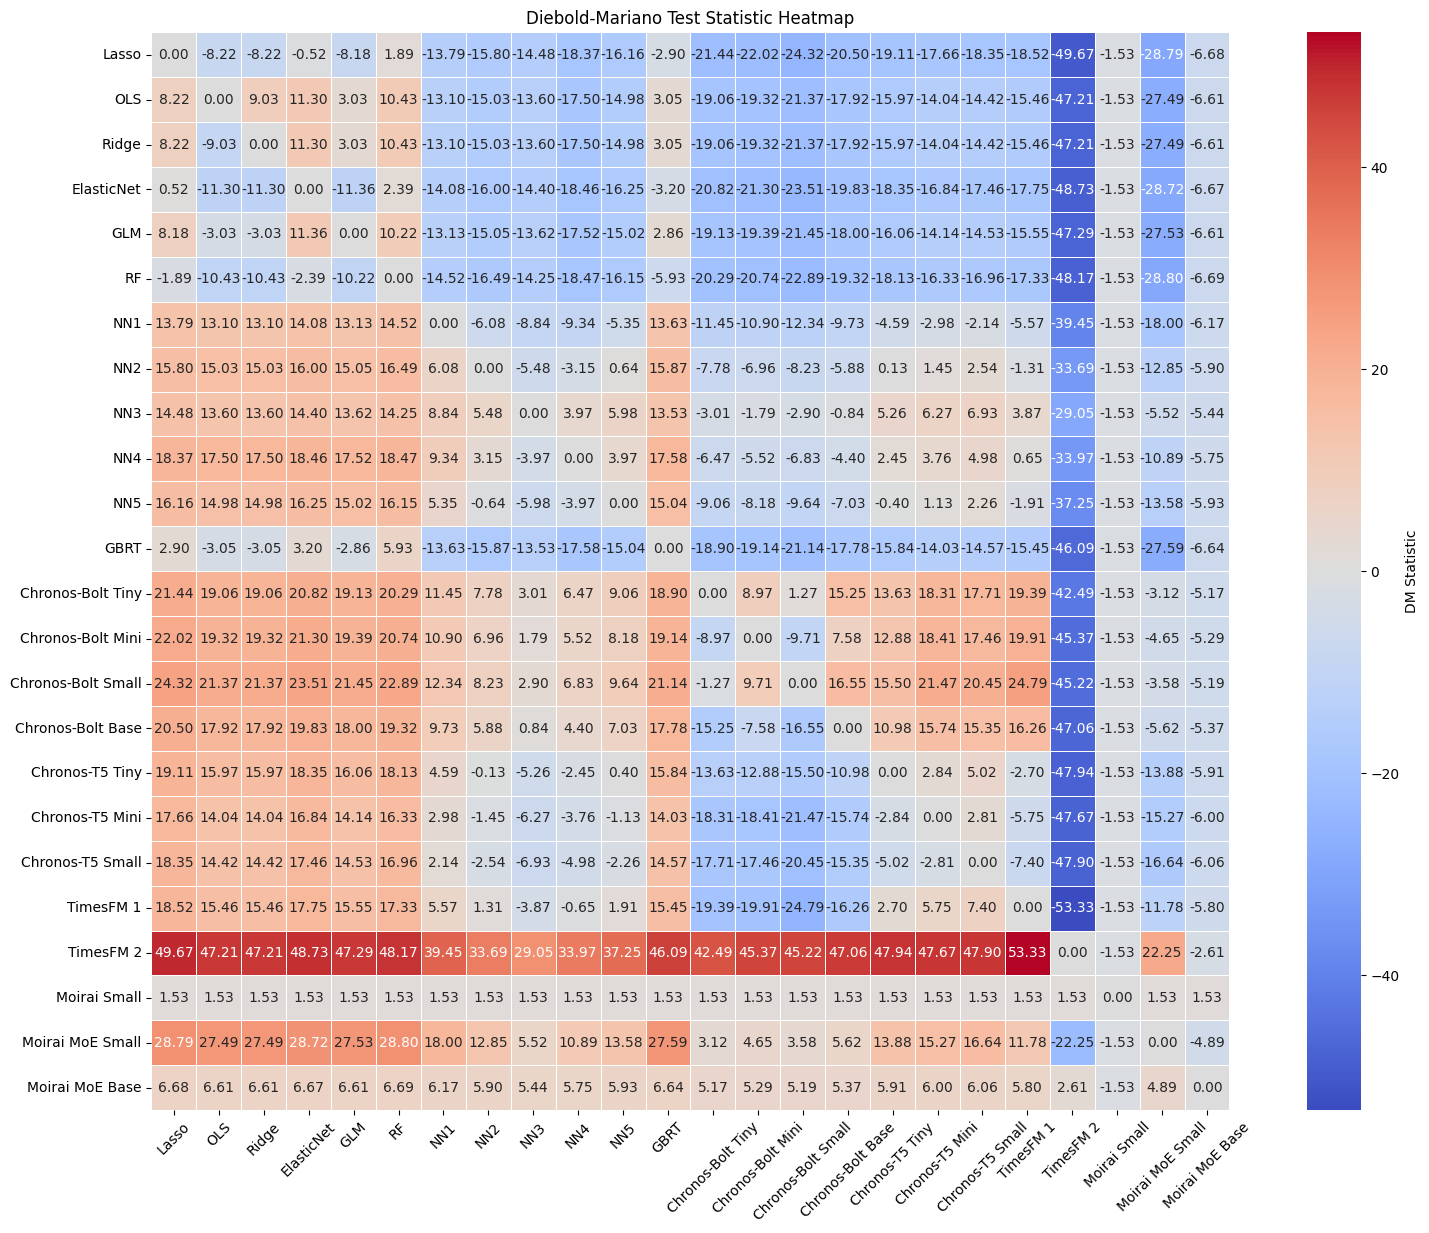

In [ ]:
# === Step 4: Plot heatmap ===

model_name_map = {
    'chr_bolt_tiny': 'Chronos-Bolt Tiny',
    'chr_bolt_mini': 'Chronos-Bolt Mini',
    'chr_bolt_small': 'Chronos-Bolt Small',
    'chr_bolt_base': 'Chronos-Bolt Base',
    'chr_t5_tiny': 'Chronos-T5 Tiny',
    'chr_t5_mini': 'Chronos-T5 Mini',
    'chr_t5_small': 'Chronos-T5 Small',
    'moirai_s': 'Moirai Small',
    'moirai_moe_s': 'Moirai MoE Small',
    'moirai_moe_b': 'Moirai MoE Base',
    'tfm1': 'TimesFM 1',
    'tfm2': 'TimesFM 2',
    'RF': 'RF',
    'GBRT': 'GBRT',
    'NN1': 'NN1',
    'NN2': 'NN2',
    'NN3': 'NN3',
    'NN4': 'NN4',
    'NN5': 'NN5',
    'Lasso': 'Lasso',
    'OLS': 'OLS',
    'Ridge': 'Ridge',
    'ElasticNet': 'ElasticNet',
    'GLM': 'GLM'
}

dm_df = dm_df.rename(index=model_name_map, columns=model_name_map)

plt.figure(figsize=(20, 14))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()2